# Fixation probability for a game:

We are interested in knowing (theorerically and numerically) what strategy will be the one that "outcompetes" all the rest for a game given by a 2 by 2 matrix (game). We define the function theoretic_fixation() to compute this using Python. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def theoretic_fixation(N, game, i=1):
    """
    Calculate x_i as given by the above formula
    """
    f_ones = np.array([(game[0, 0] * (i - 1) + game[0, 1] * (N - i)) / (N - 1) for i in range(1, N)])
    f_twos = np.array([(game[1, 0] * i + game[1, 1] * (N - i - 1)) / (N - 1) for i in range(1, N)])
    gammas = f_twos / f_ones  #if gamma > 1 it means that the fitness of strategy 2 is biggger thant the fitness for strategy 1
    return (1 + np.sum(np.cumprod(gammas[:i-1]))) / (1 + np.sum(np.cumprod(gammas)))

In [3]:
# Create game and test function
A = np.array([[4, 1],  [1, 4]])
theoretic_fixation(N=4, i=1, game=A)

0.125

In [0]:
def moran(N, game, i=1, seed=0):
    """
    Return the population counts for 
    the Moran process on a 2 by 2 game
    """
    population = [0 for _ in range(i)] + [1 for _ in range(N - i)] #assign 0 to people using strategy 1, assign 1 for people using strategy 2.
    counts = [(population.count(0), population.count(1))]
    
    np.random.seed(seed) # make results replicable
    
    # captures fitness (score)
    while len(set(population)) == 2:
        
        scores = []
        
        for i, player in enumerate(population):
            total = 0
            for j, opponent in enumerate(population):
                if i != j:
                    total += game[player, opponent]
            scores.append(total)

        total_score = sum(scores)  
        probabilities = [score / total_score for score in scores] #gives idea of who is winning 
        reproduce_index = np.random.choice(range(N), p=probabilities) #reproduce randomly, but smart i.e according to probabilites         
        eliminate_index = np.random.randint(N)   # eliminate random individual
        population[eliminate_index] = population[reproduce_index] # replaces eliminated individual with reproced individual
        
        counts.append((population.count(0), population.count(1))) # how many people are using strategy 1 and strategy 2
    return counts

def fixation(N, game, i=None, repetitions=10):
    """
    Repeat the Moran process and calculate the fixation probability
    """
    fixation_count = 0
    for seed in range(repetitions):
        final_counts = moran(N=N, i=i, game=game, seed=seed)
        if final_counts[-1][0] > 0:
            fixation_count += 1
    return  fixation_count / repetitions

1.0


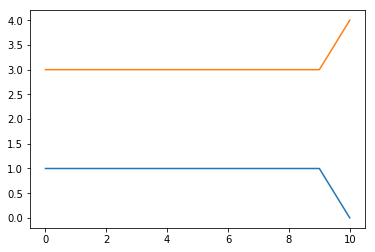

In [5]:
# Plot outcome of N interactions 

N = 4
plt.plot(moran(N=N, i=1, seed=0, game=A));
print(fixation(N=1,game = A, i=1, repetitions = 100))